## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055


0:	learn: 0.9629179	total: 49.2ms	remaining: 49.1s
1:	learn: 0.9301086	total: 51.3ms	remaining: 25.6s
2:	learn: 0.9005637	total: 53.2ms	remaining: 17.7s
3:	learn: 0.8720983	total: 55.3ms	remaining: 13.8s
4:	learn: 0.8467410	total: 57.1ms	remaining: 11.4s
5:	learn: 0.8226672	total: 59ms	remaining: 9.77s
6:	learn: 0.7994702	total: 60.9ms	remaining: 8.64s
7:	learn: 0.7784272	total: 62.8ms	remaining: 7.78s
8:	learn: 0.7602192	total: 64.5ms	remaining: 7.11s
9:	learn: 0.7412421	total: 66.4ms	remaining: 6.57s
10:	learn: 0.7247930	total: 68.3ms	remaining: 6.14s
11:	learn: 0.7089951	total: 70.3ms	remaining: 5.79s
12:	learn: 0.6951345	total: 72.2ms	remaining: 5.48s
13:	learn: 0.6809276	total: 74ms	remaining: 5.21s
14:	learn: 0.6692630	total: 75.9ms	remaining: 4.98s
15:	learn: 0.6588323	total: 77.6ms	remaining: 4.77s
16:	learn: 0.6472700	total: 79.5ms	remaining: 4.6s
17:	learn: 0.6379982	total: 81.4ms	remaining: 4.44s
18:	learn: 0.6294674	total: 83.4ms	remaining: 4.3s
19:	learn: 0.6193295	total: 

60:	learn: 0.4809744	total: 164ms	remaining: 2.52s
61:	learn: 0.4801376	total: 166ms	remaining: 2.51s
62:	learn: 0.4792422	total: 168ms	remaining: 2.5s
63:	learn: 0.4780719	total: 170ms	remaining: 2.49s
64:	learn: 0.4771984	total: 172ms	remaining: 2.47s
65:	learn: 0.4759610	total: 174ms	remaining: 2.46s
66:	learn: 0.4750287	total: 176ms	remaining: 2.45s
67:	learn: 0.4740093	total: 178ms	remaining: 2.44s
68:	learn: 0.4732612	total: 180ms	remaining: 2.42s
69:	learn: 0.4727266	total: 182ms	remaining: 2.41s
70:	learn: 0.4716549	total: 184ms	remaining: 2.4s
71:	learn: 0.4709088	total: 186ms	remaining: 2.39s
72:	learn: 0.4697594	total: 187ms	remaining: 2.38s
73:	learn: 0.4690934	total: 189ms	remaining: 2.37s
74:	learn: 0.4680942	total: 191ms	remaining: 2.36s
75:	learn: 0.4672726	total: 193ms	remaining: 2.35s
76:	learn: 0.4664479	total: 195ms	remaining: 2.34s
77:	learn: 0.4656044	total: 197ms	remaining: 2.33s
78:	learn: 0.4645375	total: 199ms	remaining: 2.32s
79:	learn: 0.4639654	total: 200ms

86:	learn: 0.4583577	total: 214ms	remaining: 2.25s
87:	learn: 0.4577999	total: 216ms	remaining: 2.24s
88:	learn: 0.4572657	total: 219ms	remaining: 2.24s
89:	learn: 0.4569360	total: 221ms	remaining: 2.23s
90:	learn: 0.4559969	total: 222ms	remaining: 2.22s
91:	learn: 0.4549716	total: 224ms	remaining: 2.21s
92:	learn: 0.4544919	total: 226ms	remaining: 2.2s
93:	learn: 0.4537693	total: 228ms	remaining: 2.2s
94:	learn: 0.4532673	total: 230ms	remaining: 2.19s
95:	learn: 0.4526987	total: 232ms	remaining: 2.18s
96:	learn: 0.4520952	total: 234ms	remaining: 2.18s
97:	learn: 0.4513919	total: 236ms	remaining: 2.17s
98:	learn: 0.4503747	total: 238ms	remaining: 2.16s
99:	learn: 0.4494783	total: 240ms	remaining: 2.16s
100:	learn: 0.4487329	total: 242ms	remaining: 2.15s
101:	learn: 0.4481325	total: 244ms	remaining: 2.14s
102:	learn: 0.4475445	total: 245ms	remaining: 2.14s
103:	learn: 0.4466014	total: 247ms	remaining: 2.13s
104:	learn: 0.4461730	total: 249ms	remaining: 2.13s
105:	learn: 0.4457259	total:

146:	learn: 0.4268458	total: 329ms	remaining: 1.91s
147:	learn: 0.4264987	total: 331ms	remaining: 1.91s
148:	learn: 0.4262192	total: 333ms	remaining: 1.9s
149:	learn: 0.4257966	total: 335ms	remaining: 1.9s
150:	learn: 0.4253062	total: 337ms	remaining: 1.89s
151:	learn: 0.4247446	total: 339ms	remaining: 1.89s
152:	learn: 0.4237365	total: 341ms	remaining: 1.89s
153:	learn: 0.4233079	total: 343ms	remaining: 1.88s
154:	learn: 0.4228876	total: 345ms	remaining: 1.88s
155:	learn: 0.4225404	total: 347ms	remaining: 1.88s
156:	learn: 0.4222831	total: 349ms	remaining: 1.87s
157:	learn: 0.4218088	total: 351ms	remaining: 1.87s
158:	learn: 0.4213239	total: 353ms	remaining: 1.86s
159:	learn: 0.4210022	total: 355ms	remaining: 1.86s
160:	learn: 0.4201256	total: 357ms	remaining: 1.86s
161:	learn: 0.4197073	total: 358ms	remaining: 1.85s
162:	learn: 0.4192052	total: 360ms	remaining: 1.85s
163:	learn: 0.4187949	total: 362ms	remaining: 1.85s
164:	learn: 0.4184572	total: 364ms	remaining: 1.84s
165:	learn: 0.

172:	learn: 0.4153041	total: 380ms	remaining: 1.82s
173:	learn: 0.4148857	total: 382ms	remaining: 1.81s
174:	learn: 0.4144190	total: 384ms	remaining: 1.81s
175:	learn: 0.4140875	total: 386ms	remaining: 1.81s
176:	learn: 0.4136755	total: 388ms	remaining: 1.8s
177:	learn: 0.4133860	total: 390ms	remaining: 1.8s
178:	learn: 0.4129780	total: 392ms	remaining: 1.8s
179:	learn: 0.4122907	total: 394ms	remaining: 1.79s
180:	learn: 0.4119188	total: 396ms	remaining: 1.79s
181:	learn: 0.4115412	total: 398ms	remaining: 1.79s
182:	learn: 0.4112620	total: 400ms	remaining: 1.79s
183:	learn: 0.4107734	total: 402ms	remaining: 1.78s
184:	learn: 0.4104881	total: 404ms	remaining: 1.78s
185:	learn: 0.4100009	total: 406ms	remaining: 1.77s
186:	learn: 0.4096453	total: 408ms	remaining: 1.77s
187:	learn: 0.4093395	total: 409ms	remaining: 1.77s
188:	learn: 0.4090020	total: 411ms	remaining: 1.76s
189:	learn: 0.4085981	total: 413ms	remaining: 1.76s
190:	learn: 0.4082397	total: 415ms	remaining: 1.76s
191:	learn: 0.4

231:	learn: 0.3954162	total: 494ms	remaining: 1.64s
232:	learn: 0.3951665	total: 496ms	remaining: 1.63s
233:	learn: 0.3949269	total: 498ms	remaining: 1.63s
234:	learn: 0.3945894	total: 500ms	remaining: 1.63s
235:	learn: 0.3944181	total: 502ms	remaining: 1.62s
236:	learn: 0.3941497	total: 504ms	remaining: 1.62s
237:	learn: 0.3939819	total: 506ms	remaining: 1.62s
238:	learn: 0.3938322	total: 507ms	remaining: 1.61s
239:	learn: 0.3935463	total: 509ms	remaining: 1.61s
240:	learn: 0.3933166	total: 511ms	remaining: 1.61s
241:	learn: 0.3930992	total: 513ms	remaining: 1.61s
242:	learn: 0.3928898	total: 515ms	remaining: 1.6s
243:	learn: 0.3926199	total: 517ms	remaining: 1.6s
244:	learn: 0.3923955	total: 519ms	remaining: 1.6s
245:	learn: 0.3922312	total: 521ms	remaining: 1.59s
246:	learn: 0.3919499	total: 522ms	remaining: 1.59s
247:	learn: 0.3917420	total: 524ms	remaining: 1.59s
248:	learn: 0.3915186	total: 526ms	remaining: 1.59s
249:	learn: 0.3912759	total: 528ms	remaining: 1.58s
250:	learn: 0.3

258:	learn: 0.3889352	total: 546ms	remaining: 1.56s
259:	learn: 0.3886531	total: 548ms	remaining: 1.56s
260:	learn: 0.3884539	total: 550ms	remaining: 1.56s
261:	learn: 0.3882459	total: 552ms	remaining: 1.55s
262:	learn: 0.3881101	total: 554ms	remaining: 1.55s
263:	learn: 0.3879324	total: 556ms	remaining: 1.55s
264:	learn: 0.3876861	total: 558ms	remaining: 1.55s
265:	learn: 0.3874255	total: 560ms	remaining: 1.54s
266:	learn: 0.3868515	total: 562ms	remaining: 1.54s
267:	learn: 0.3866114	total: 563ms	remaining: 1.54s
268:	learn: 0.3863119	total: 565ms	remaining: 1.54s
269:	learn: 0.3860579	total: 567ms	remaining: 1.53s
270:	learn: 0.3858830	total: 569ms	remaining: 1.53s
271:	learn: 0.3857050	total: 571ms	remaining: 1.53s
272:	learn: 0.3855021	total: 573ms	remaining: 1.53s
273:	learn: 0.3852614	total: 575ms	remaining: 1.52s
274:	learn: 0.3851459	total: 577ms	remaining: 1.52s
275:	learn: 0.3849180	total: 579ms	remaining: 1.52s
276:	learn: 0.3846590	total: 581ms	remaining: 1.52s
277:	learn: 

317:	learn: 0.3762751	total: 660ms	remaining: 1.42s
318:	learn: 0.3761284	total: 662ms	remaining: 1.41s
319:	learn: 0.3760168	total: 664ms	remaining: 1.41s
320:	learn: 0.3757763	total: 666ms	remaining: 1.41s
321:	learn: 0.3756076	total: 668ms	remaining: 1.41s
322:	learn: 0.3754123	total: 670ms	remaining: 1.4s
323:	learn: 0.3751852	total: 672ms	remaining: 1.4s
324:	learn: 0.3750004	total: 674ms	remaining: 1.4s
325:	learn: 0.3749086	total: 676ms	remaining: 1.4s
326:	learn: 0.3746654	total: 678ms	remaining: 1.39s
327:	learn: 0.3745405	total: 679ms	remaining: 1.39s
328:	learn: 0.3743710	total: 681ms	remaining: 1.39s
329:	learn: 0.3741679	total: 683ms	remaining: 1.39s
330:	learn: 0.3738646	total: 685ms	remaining: 1.38s
331:	learn: 0.3736647	total: 687ms	remaining: 1.38s
332:	learn: 0.3733429	total: 689ms	remaining: 1.38s
333:	learn: 0.3732059	total: 691ms	remaining: 1.38s
334:	learn: 0.3730574	total: 693ms	remaining: 1.38s
335:	learn: 0.3728663	total: 695ms	remaining: 1.37s
336:	learn: 0.37

343:	learn: 0.3713389	total: 710ms	remaining: 1.35s
344:	learn: 0.3711642	total: 712ms	remaining: 1.35s
345:	learn: 0.3709569	total: 714ms	remaining: 1.35s
346:	learn: 0.3708184	total: 716ms	remaining: 1.35s
347:	learn: 0.3705958	total: 718ms	remaining: 1.34s
348:	learn: 0.3703798	total: 720ms	remaining: 1.34s
349:	learn: 0.3701923	total: 721ms	remaining: 1.34s
350:	learn: 0.3700067	total: 723ms	remaining: 1.34s
351:	learn: 0.3698930	total: 725ms	remaining: 1.33s
352:	learn: 0.3697314	total: 727ms	remaining: 1.33s
353:	learn: 0.3695617	total: 729ms	remaining: 1.33s
354:	learn: 0.3694397	total: 731ms	remaining: 1.33s
355:	learn: 0.3692589	total: 733ms	remaining: 1.33s
356:	learn: 0.3691107	total: 735ms	remaining: 1.32s
357:	learn: 0.3689645	total: 738ms	remaining: 1.32s
358:	learn: 0.3687886	total: 740ms	remaining: 1.32s
359:	learn: 0.3686485	total: 742ms	remaining: 1.32s
360:	learn: 0.3685749	total: 744ms	remaining: 1.32s
361:	learn: 0.3683909	total: 746ms	remaining: 1.31s
362:	learn: 

402:	learn: 0.3618403	total: 825ms	remaining: 1.22s
403:	learn: 0.3616747	total: 827ms	remaining: 1.22s
404:	learn: 0.3614255	total: 829ms	remaining: 1.22s
405:	learn: 0.3613607	total: 831ms	remaining: 1.22s
406:	learn: 0.3612875	total: 833ms	remaining: 1.21s
407:	learn: 0.3611516	total: 835ms	remaining: 1.21s
408:	learn: 0.3609621	total: 837ms	remaining: 1.21s
409:	learn: 0.3608193	total: 839ms	remaining: 1.21s
410:	learn: 0.3604920	total: 841ms	remaining: 1.21s
411:	learn: 0.3603038	total: 843ms	remaining: 1.2s
412:	learn: 0.3602055	total: 846ms	remaining: 1.2s
413:	learn: 0.3599094	total: 848ms	remaining: 1.2s
414:	learn: 0.3597887	total: 850ms	remaining: 1.2s
415:	learn: 0.3595791	total: 852ms	remaining: 1.2s
416:	learn: 0.3594487	total: 854ms	remaining: 1.19s
417:	learn: 0.3592759	total: 856ms	remaining: 1.19s
418:	learn: 0.3591088	total: 858ms	remaining: 1.19s
419:	learn: 0.3589470	total: 860ms	remaining: 1.19s
420:	learn: 0.3587972	total: 862ms	remaining: 1.19s
421:	learn: 0.358

425:	learn: 0.3581698	total: 873ms	remaining: 1.18s
426:	learn: 0.3580461	total: 876ms	remaining: 1.17s
427:	learn: 0.3579182	total: 878ms	remaining: 1.17s
428:	learn: 0.3577521	total: 880ms	remaining: 1.17s
429:	learn: 0.3576138	total: 882ms	remaining: 1.17s
430:	learn: 0.3575528	total: 884ms	remaining: 1.17s
431:	learn: 0.3574686	total: 886ms	remaining: 1.16s
432:	learn: 0.3572923	total: 888ms	remaining: 1.16s
433:	learn: 0.3571859	total: 890ms	remaining: 1.16s
434:	learn: 0.3570185	total: 892ms	remaining: 1.16s
435:	learn: 0.3568416	total: 894ms	remaining: 1.16s
436:	learn: 0.3566846	total: 896ms	remaining: 1.15s
437:	learn: 0.3565875	total: 898ms	remaining: 1.15s
438:	learn: 0.3564768	total: 900ms	remaining: 1.15s
439:	learn: 0.3563559	total: 902ms	remaining: 1.15s
440:	learn: 0.3561557	total: 905ms	remaining: 1.15s
441:	learn: 0.3559793	total: 907ms	remaining: 1.14s
442:	learn: 0.3558695	total: 909ms	remaining: 1.14s
443:	learn: 0.3557039	total: 911ms	remaining: 1.14s
444:	learn: 

481:	learn: 0.3503906	total: 989ms	remaining: 1.06s
482:	learn: 0.3501522	total: 991ms	remaining: 1.06s
483:	learn: 0.3500494	total: 993ms	remaining: 1.06s
484:	learn: 0.3498921	total: 995ms	remaining: 1.06s
485:	learn: 0.3497143	total: 997ms	remaining: 1.05s
486:	learn: 0.3496172	total: 999ms	remaining: 1.05s
487:	learn: 0.3494609	total: 1s	remaining: 1.05s
488:	learn: 0.3493200	total: 1s	remaining: 1.05s
489:	learn: 0.3491550	total: 1s	remaining: 1.04s
490:	learn: 0.3490323	total: 1.01s	remaining: 1.04s
491:	learn: 0.3488767	total: 1.01s	remaining: 1.04s
492:	learn: 0.3487285	total: 1.01s	remaining: 1.04s
493:	learn: 0.3486318	total: 1.01s	remaining: 1.04s
494:	learn: 0.3485016	total: 1.01s	remaining: 1.03s
495:	learn: 0.3484072	total: 1.02s	remaining: 1.03s
496:	learn: 0.3482698	total: 1.02s	remaining: 1.03s
497:	learn: 0.3481630	total: 1.02s	remaining: 1.03s
498:	learn: 0.3480855	total: 1.02s	remaining: 1.03s
499:	learn: 0.3478655	total: 1.02s	remaining: 1.02s
500:	learn: 0.3477966

505:	learn: 0.3471124	total: 1.04s	remaining: 1.01s
506:	learn: 0.3469987	total: 1.04s	remaining: 1.01s
507:	learn: 0.3469000	total: 1.04s	remaining: 1.01s
508:	learn: 0.3467621	total: 1.04s	remaining: 1.01s
509:	learn: 0.3466653	total: 1.04s	remaining: 1s
510:	learn: 0.3465795	total: 1.05s	remaining: 1s
511:	learn: 0.3464899	total: 1.05s	remaining: 1s
512:	learn: 0.3463711	total: 1.05s	remaining: 998ms
513:	learn: 0.3462483	total: 1.05s	remaining: 996ms
514:	learn: 0.3460733	total: 1.05s	remaining: 994ms
515:	learn: 0.3459427	total: 1.06s	remaining: 992ms
516:	learn: 0.3458363	total: 1.06s	remaining: 990ms
517:	learn: 0.3456145	total: 1.06s	remaining: 988ms
518:	learn: 0.3455174	total: 1.06s	remaining: 986ms
519:	learn: 0.3453867	total: 1.07s	remaining: 984ms
520:	learn: 0.3453067	total: 1.07s	remaining: 982ms
521:	learn: 0.3451017	total: 1.07s	remaining: 980ms
522:	learn: 0.3449560	total: 1.07s	remaining: 978ms
523:	learn: 0.3448379	total: 1.07s	remaining: 976ms
524:	learn: 0.3447174

563:	learn: 0.3400466	total: 1.15s	remaining: 892ms
564:	learn: 0.3399235	total: 1.16s	remaining: 890ms
565:	learn: 0.3398064	total: 1.16s	remaining: 888ms
566:	learn: 0.3396466	total: 1.16s	remaining: 886ms
567:	learn: 0.3395531	total: 1.16s	remaining: 884ms
568:	learn: 0.3394093	total: 1.16s	remaining: 882ms
569:	learn: 0.3393241	total: 1.17s	remaining: 880ms
570:	learn: 0.3392368	total: 1.17s	remaining: 878ms
571:	learn: 0.3391373	total: 1.17s	remaining: 876ms
572:	learn: 0.3390261	total: 1.17s	remaining: 873ms
573:	learn: 0.3389126	total: 1.17s	remaining: 871ms
574:	learn: 0.3388268	total: 1.18s	remaining: 869ms
575:	learn: 0.3387474	total: 1.18s	remaining: 867ms
576:	learn: 0.3386361	total: 1.18s	remaining: 865ms
577:	learn: 0.3385706	total: 1.18s	remaining: 863ms
578:	learn: 0.3384814	total: 1.18s	remaining: 861ms
579:	learn: 0.3383559	total: 1.19s	remaining: 859ms
580:	learn: 0.3382469	total: 1.19s	remaining: 857ms
581:	learn: 0.3381645	total: 1.19s	remaining: 855ms
582:	learn: 

587:	learn: 0.3376434	total: 1.2s	remaining: 842ms
588:	learn: 0.3375696	total: 1.2s	remaining: 840ms
589:	learn: 0.3374902	total: 1.21s	remaining: 838ms
590:	learn: 0.3373056	total: 1.21s	remaining: 836ms
591:	learn: 0.3371913	total: 1.21s	remaining: 834ms
592:	learn: 0.3371272	total: 1.21s	remaining: 832ms
593:	learn: 0.3370368	total: 1.21s	remaining: 830ms
594:	learn: 0.3368150	total: 1.22s	remaining: 828ms
595:	learn: 0.3367491	total: 1.22s	remaining: 826ms
596:	learn: 0.3366496	total: 1.22s	remaining: 823ms
597:	learn: 0.3365561	total: 1.22s	remaining: 821ms
598:	learn: 0.3364801	total: 1.22s	remaining: 819ms
599:	learn: 0.3363937	total: 1.23s	remaining: 817ms
600:	learn: 0.3363054	total: 1.23s	remaining: 815ms
601:	learn: 0.3361892	total: 1.23s	remaining: 813ms
602:	learn: 0.3360683	total: 1.23s	remaining: 811ms
603:	learn: 0.3359807	total: 1.23s	remaining: 809ms
604:	learn: 0.3359096	total: 1.24s	remaining: 806ms
605:	learn: 0.3358268	total: 1.24s	remaining: 804ms
606:	learn: 0.

645:	learn: 0.3316585	total: 1.32s	remaining: 723ms
646:	learn: 0.3316256	total: 1.32s	remaining: 721ms
647:	learn: 0.3315220	total: 1.32s	remaining: 719ms
648:	learn: 0.3313829	total: 1.33s	remaining: 718ms
649:	learn: 0.3313125	total: 1.33s	remaining: 716ms
650:	learn: 0.3311735	total: 1.33s	remaining: 714ms
651:	learn: 0.3310386	total: 1.33s	remaining: 712ms
652:	learn: 0.3309129	total: 1.33s	remaining: 710ms
653:	learn: 0.3308321	total: 1.34s	remaining: 708ms
654:	learn: 0.3307342	total: 1.34s	remaining: 705ms
655:	learn: 0.3306809	total: 1.34s	remaining: 703ms
656:	learn: 0.3305729	total: 1.34s	remaining: 701ms
657:	learn: 0.3304900	total: 1.34s	remaining: 699ms
658:	learn: 0.3303842	total: 1.35s	remaining: 697ms
659:	learn: 0.3302235	total: 1.35s	remaining: 695ms
660:	learn: 0.3300983	total: 1.35s	remaining: 693ms
661:	learn: 0.3299994	total: 1.35s	remaining: 691ms
662:	learn: 0.3299184	total: 1.36s	remaining: 689ms
663:	learn: 0.3298189	total: 1.36s	remaining: 687ms
664:	learn: 

667:	learn: 0.3295390	total: 1.37s	remaining: 679ms
668:	learn: 0.3294195	total: 1.37s	remaining: 677ms
669:	learn: 0.3293185	total: 1.37s	remaining: 675ms
670:	learn: 0.3292086	total: 1.37s	remaining: 673ms
671:	learn: 0.3289913	total: 1.38s	remaining: 671ms
672:	learn: 0.3288859	total: 1.38s	remaining: 669ms
673:	learn: 0.3288145	total: 1.38s	remaining: 667ms
674:	learn: 0.3286969	total: 1.38s	remaining: 665ms
675:	learn: 0.3286108	total: 1.38s	remaining: 663ms
676:	learn: 0.3285218	total: 1.39s	remaining: 661ms
677:	learn: 0.3284620	total: 1.39s	remaining: 659ms
678:	learn: 0.3283999	total: 1.39s	remaining: 657ms
679:	learn: 0.3283506	total: 1.39s	remaining: 655ms
680:	learn: 0.3282208	total: 1.39s	remaining: 653ms
681:	learn: 0.3281020	total: 1.4s	remaining: 651ms
682:	learn: 0.3280328	total: 1.4s	remaining: 649ms
683:	learn: 0.3279574	total: 1.4s	remaining: 647ms
684:	learn: 0.3278928	total: 1.4s	remaining: 645ms
685:	learn: 0.3278094	total: 1.4s	remaining: 643ms
686:	learn: 0.327

722:	learn: 0.3244558	total: 1.48s	remaining: 568ms
723:	learn: 0.3243835	total: 1.49s	remaining: 566ms
724:	learn: 0.3242957	total: 1.49s	remaining: 564ms
725:	learn: 0.3242628	total: 1.49s	remaining: 562ms
726:	learn: 0.3242076	total: 1.49s	remaining: 560ms
727:	learn: 0.3240923	total: 1.49s	remaining: 558ms
728:	learn: 0.3240148	total: 1.5s	remaining: 556ms
729:	learn: 0.3239014	total: 1.5s	remaining: 554ms
730:	learn: 0.3237918	total: 1.5s	remaining: 552ms
731:	learn: 0.3236654	total: 1.5s	remaining: 550ms
732:	learn: 0.3235938	total: 1.5s	remaining: 548ms
733:	learn: 0.3235120	total: 1.51s	remaining: 546ms
734:	learn: 0.3234421	total: 1.51s	remaining: 544ms
735:	learn: 0.3233367	total: 1.51s	remaining: 542ms
736:	learn: 0.3232438	total: 1.51s	remaining: 540ms
737:	learn: 0.3231289	total: 1.51s	remaining: 538ms
738:	learn: 0.3230697	total: 1.52s	remaining: 536ms
739:	learn: 0.3229734	total: 1.52s	remaining: 533ms
740:	learn: 0.3228697	total: 1.52s	remaining: 531ms
741:	learn: 0.322

744:	learn: 0.3225096	total: 1.53s	remaining: 524ms
745:	learn: 0.3224088	total: 1.53s	remaining: 522ms
746:	learn: 0.3223202	total: 1.53s	remaining: 519ms
747:	learn: 0.3222404	total: 1.53s	remaining: 517ms
748:	learn: 0.3221810	total: 1.54s	remaining: 515ms
749:	learn: 0.3221342	total: 1.54s	remaining: 513ms
750:	learn: 0.3220746	total: 1.54s	remaining: 511ms
751:	learn: 0.3219897	total: 1.54s	remaining: 509ms
752:	learn: 0.3218990	total: 1.54s	remaining: 507ms
753:	learn: 0.3218179	total: 1.55s	remaining: 505ms
754:	learn: 0.3217323	total: 1.55s	remaining: 503ms
755:	learn: 0.3216617	total: 1.55s	remaining: 501ms
756:	learn: 0.3216090	total: 1.55s	remaining: 499ms
757:	learn: 0.3215306	total: 1.56s	remaining: 497ms
758:	learn: 0.3214274	total: 1.56s	remaining: 496ms
759:	learn: 0.3212014	total: 1.56s	remaining: 494ms
760:	learn: 0.3211190	total: 1.56s	remaining: 492ms
761:	learn: 0.3210312	total: 1.57s	remaining: 490ms
762:	learn: 0.3209495	total: 1.57s	remaining: 488ms
763:	learn: 

799:	learn: 0.3177655	total: 1.65s	remaining: 412ms
800:	learn: 0.3176826	total: 1.65s	remaining: 410ms
801:	learn: 0.3176217	total: 1.65s	remaining: 408ms
802:	learn: 0.3174842	total: 1.65s	remaining: 406ms
803:	learn: 0.3173800	total: 1.66s	remaining: 404ms
804:	learn: 0.3172892	total: 1.66s	remaining: 402ms
805:	learn: 0.3172199	total: 1.66s	remaining: 399ms
806:	learn: 0.3171379	total: 1.66s	remaining: 397ms
807:	learn: 0.3170699	total: 1.66s	remaining: 395ms
808:	learn: 0.3170027	total: 1.67s	remaining: 393ms
809:	learn: 0.3169244	total: 1.67s	remaining: 391ms
810:	learn: 0.3168075	total: 1.67s	remaining: 389ms
811:	learn: 0.3167047	total: 1.67s	remaining: 387ms
812:	learn: 0.3166132	total: 1.67s	remaining: 385ms
813:	learn: 0.3165391	total: 1.68s	remaining: 383ms
814:	learn: 0.3164726	total: 1.68s	remaining: 381ms
815:	learn: 0.3164087	total: 1.68s	remaining: 379ms
816:	learn: 0.3163590	total: 1.68s	remaining: 377ms
817:	learn: 0.3162644	total: 1.69s	remaining: 375ms
818:	learn: 

821:	learn: 0.3159403	total: 1.69s	remaining: 367ms
822:	learn: 0.3158160	total: 1.7s	remaining: 365ms
823:	learn: 0.3157523	total: 1.7s	remaining: 363ms
824:	learn: 0.3156673	total: 1.7s	remaining: 361ms
825:	learn: 0.3156288	total: 1.7s	remaining: 359ms
826:	learn: 0.3155257	total: 1.7s	remaining: 357ms
827:	learn: 0.3154546	total: 1.71s	remaining: 355ms
828:	learn: 0.3153664	total: 1.71s	remaining: 352ms
829:	learn: 0.3152896	total: 1.71s	remaining: 350ms
830:	learn: 0.3152050	total: 1.71s	remaining: 348ms
831:	learn: 0.3151385	total: 1.72s	remaining: 346ms
832:	learn: 0.3150922	total: 1.72s	remaining: 344ms
833:	learn: 0.3149588	total: 1.72s	remaining: 342ms
834:	learn: 0.3149074	total: 1.72s	remaining: 340ms
835:	learn: 0.3148291	total: 1.72s	remaining: 338ms
836:	learn: 0.3147707	total: 1.73s	remaining: 336ms
837:	learn: 0.3147022	total: 1.73s	remaining: 334ms
838:	learn: 0.3145737	total: 1.73s	remaining: 332ms
839:	learn: 0.3144908	total: 1.73s	remaining: 330ms
840:	learn: 0.314

876:	learn: 0.3116810	total: 1.81s	remaining: 254ms
877:	learn: 0.3116088	total: 1.81s	remaining: 252ms
878:	learn: 0.3115190	total: 1.81s	remaining: 250ms
879:	learn: 0.3114687	total: 1.81s	remaining: 248ms
880:	learn: 0.3113934	total: 1.82s	remaining: 246ms
881:	learn: 0.3113378	total: 1.82s	remaining: 243ms
882:	learn: 0.3112367	total: 1.82s	remaining: 241ms
883:	learn: 0.3111915	total: 1.82s	remaining: 239ms
884:	learn: 0.3111075	total: 1.82s	remaining: 237ms
885:	learn: 0.3110486	total: 1.83s	remaining: 235ms
886:	learn: 0.3109334	total: 1.83s	remaining: 233ms
887:	learn: 0.3108347	total: 1.83s	remaining: 231ms
888:	learn: 0.3107647	total: 1.83s	remaining: 229ms
889:	learn: 0.3107302	total: 1.83s	remaining: 227ms
890:	learn: 0.3106509	total: 1.84s	remaining: 225ms
891:	learn: 0.3106139	total: 1.84s	remaining: 223ms
892:	learn: 0.3105421	total: 1.84s	remaining: 221ms
893:	learn: 0.3104659	total: 1.84s	remaining: 219ms
894:	learn: 0.3104028	total: 1.84s	remaining: 217ms
895:	learn: 

898:	learn: 0.3100955	total: 1.85s	remaining: 208ms
899:	learn: 0.3100512	total: 1.85s	remaining: 206ms
900:	learn: 0.3100138	total: 1.86s	remaining: 204ms
901:	learn: 0.3099635	total: 1.86s	remaining: 202ms
902:	learn: 0.3098989	total: 1.86s	remaining: 200ms
903:	learn: 0.3098084	total: 1.86s	remaining: 198ms
904:	learn: 0.3097402	total: 1.87s	remaining: 196ms
905:	learn: 0.3096378	total: 1.87s	remaining: 194ms
906:	learn: 0.3095878	total: 1.87s	remaining: 192ms
907:	learn: 0.3095154	total: 1.87s	remaining: 190ms
908:	learn: 0.3094688	total: 1.87s	remaining: 188ms
909:	learn: 0.3093784	total: 1.88s	remaining: 186ms
910:	learn: 0.3093058	total: 1.88s	remaining: 184ms
911:	learn: 0.3092574	total: 1.88s	remaining: 181ms
912:	learn: 0.3092023	total: 1.88s	remaining: 179ms
913:	learn: 0.3091306	total: 1.88s	remaining: 177ms
914:	learn: 0.3090719	total: 1.89s	remaining: 175ms
915:	learn: 0.3090199	total: 1.89s	remaining: 173ms
916:	learn: 0.3089417	total: 1.89s	remaining: 171ms
917:	learn: 

958:	learn: 0.3057985	total: 1.97s	remaining: 84.3ms
959:	learn: 0.3056692	total: 1.98s	remaining: 82.3ms
960:	learn: 0.3055777	total: 1.98s	remaining: 80.2ms
961:	learn: 0.3054462	total: 1.98s	remaining: 78.2ms
962:	learn: 0.3053516	total: 1.98s	remaining: 76.1ms
963:	learn: 0.3052664	total: 1.98s	remaining: 74.1ms
964:	learn: 0.3052264	total: 1.98s	remaining: 72ms
965:	learn: 0.3051873	total: 1.99s	remaining: 69.9ms
966:	learn: 0.3051018	total: 1.99s	remaining: 67.9ms
967:	learn: 0.3050172	total: 1.99s	remaining: 65.8ms
968:	learn: 0.3049470	total: 1.99s	remaining: 63.7ms
969:	learn: 0.3049028	total: 1.99s	remaining: 61.7ms
970:	learn: 0.3048446	total: 2s	remaining: 59.6ms
971:	learn: 0.3047712	total: 2s	remaining: 57.6ms
972:	learn: 0.3047313	total: 2s	remaining: 55.5ms
973:	learn: 0.3046600	total: 2s	remaining: 53.5ms
974:	learn: 0.3045983	total: 2s	remaining: 51.4ms
975:	learn: 0.3044944	total: 2.01s	remaining: 49.3ms
976:	learn: 0.3044431	total: 2.01s	remaining: 47.3ms
977:	learn

981:	learn: 0.3041509	total: 2.02s	remaining: 37ms
982:	learn: 0.3041077	total: 2.02s	remaining: 34.9ms
983:	learn: 0.3040665	total: 2.02s	remaining: 32.9ms
984:	learn: 0.3040237	total: 2.02s	remaining: 30.8ms
985:	learn: 0.3039532	total: 2.03s	remaining: 28.8ms
986:	learn: 0.3038723	total: 2.03s	remaining: 26.7ms
987:	learn: 0.3038141	total: 2.03s	remaining: 24.7ms
988:	learn: 0.3037455	total: 2.03s	remaining: 22.6ms
989:	learn: 0.3036820	total: 2.03s	remaining: 20.5ms
990:	learn: 0.3036165	total: 2.04s	remaining: 18.5ms
991:	learn: 0.3035759	total: 2.04s	remaining: 16.4ms
992:	learn: 0.3035124	total: 2.04s	remaining: 14.4ms
993:	learn: 0.3034295	total: 2.04s	remaining: 12.3ms
994:	learn: 0.3033612	total: 2.04s	remaining: 10.3ms
995:	learn: 0.3033209	total: 2.05s	remaining: 8.22ms
996:	learn: 0.3032659	total: 2.05s	remaining: 6.16ms
997:	learn: 0.3032189	total: 2.05s	remaining: 4.11ms
998:	learn: 0.3031594	total: 2.05s	remaining: 2.05ms
999:	learn: 0.3030916	total: 2.05s	remaining: 0u

# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10517082221436778


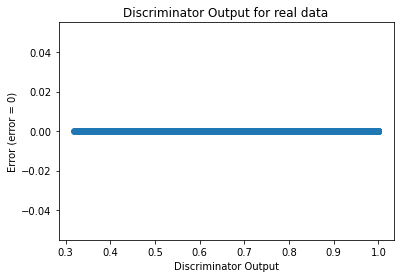

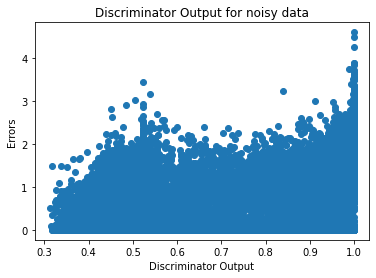

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)
